# Jiaxu He
# ANLY-590
# Assignment 0


## 1. Regularization

### 1.1 Use LASSO regression to predict Salary from the other numeric predictors (you should omit the categorical predictors). 
#### 1.1.1. Create a visualization of the coefficient trajectories

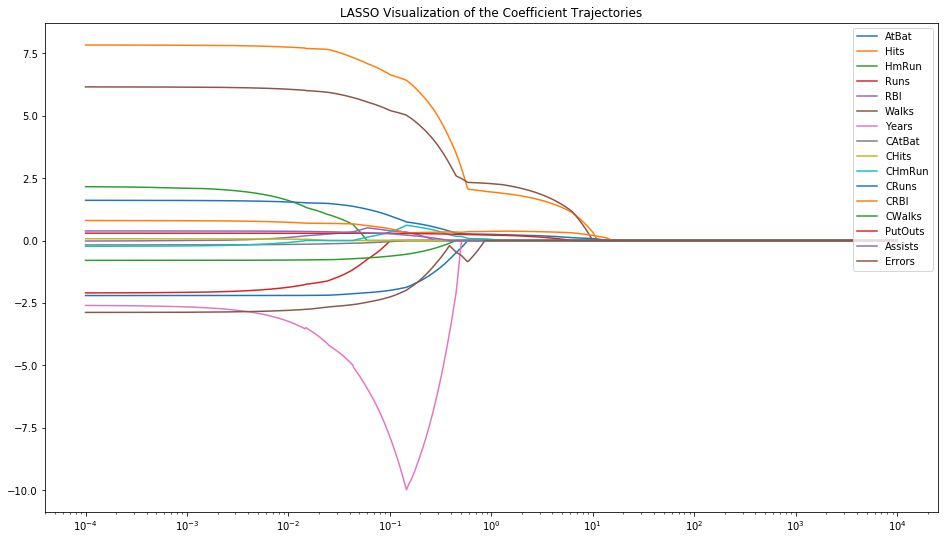

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV

hitters = pd.read_csv("Hitters.csv")
df = hitters.dropna().drop(["League", "NewLeague", "Division"], axis = 1)
df = df.drop(df.columns[0], axis = 1)
#df.head()
salary = df.Salary
X = df.drop(["Salary"], axis = 1)

alphas = np.logspace(-4, 4, 1000)

lasso = Lasso(max_iter = 10000, normalize = True)
coefficients = []

for alp in alphas:
    lasso.set_params(alpha = alp)
    lasso.fit(X, salary)
    coefficients.append(lasso.coef_)

plt.figure(num = None, figsize = (16, 9))
ax = plt.gca()
ax.plot(alphas, coefficients)
ax.set_xscale("log")

plt.title("LASSO Visualization of the Coefficient Trajectories")
plt.legend(list(X), loc=1)
plt.show()


#### 1.1.2. Comment on which are the final three predictors that remain in the model



In [81]:
print(df.columns)
print(coefficients[0])
print(coefficients[630])

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'Salary'],
      dtype='object')
[-2.20302151  7.82648894  2.15521301 -2.09685798 -0.01999064  6.14989934
 -2.59904443 -0.17608715  0.06968274 -0.23126201  1.60931943  0.80056206
 -0.79379537  0.29457994  0.38386385 -2.87805356]
[ 0.          0.01030955  0.          0.          0.          0.          0.
  0.          0.          0.          0.06166252  0.17353018  0.          0.
  0.          0.        ]


After servery tries, the results showed above told the final three predictors that remain in the model. And they are "Hits", "CRuns", "CRBI".


#### 1.1.3. Use cross-validation to find the optimal value of the regularization penalty

In [76]:
lassocv = LassoCV(alphas = alphas, cv = 10, normalize = True)
lassocv.fit(X, salary)

print(lassocv.alpha_)

0.0623440188863


As the result showed above, the optimal value of the regularization penalty is 0.0623440188863.


#### 1.1.4. How many predictors are left in that model?

In [77]:
pd.Series(lassocv.coef_, index = X.columns)

AtBat     -2.085820
Hits       7.054275
HmRun      0.000000
Runs      -0.704491
RBI        0.500140
Walks      5.521875
Years     -6.049741
CAtBat    -0.088405
CHits      0.000000
CHmRun     0.150479
CRuns      1.235885
CRBI       0.587491
CWalks    -0.692770
PutOuts    0.292782
Assists    0.305531
Errors    -2.457105
dtype: float64

As the results showed above and counted, there are 14 predictors left in that model.



### 1.2 Repeat with Ridge Regression. 
#### 1.2.1 Visualize the coefficient trajectories

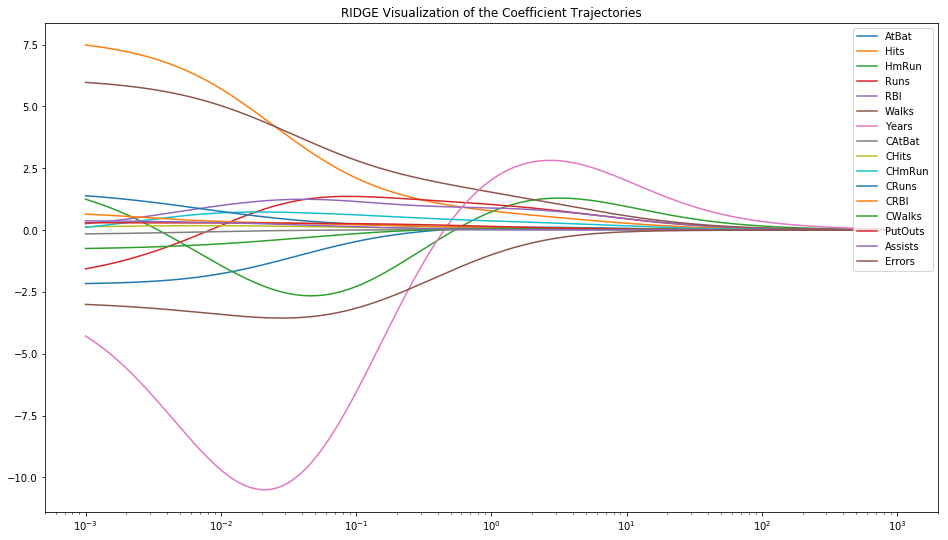

In [87]:
ridge = Ridge(max_iter = 10000, normalize = True)
coefficients2 = []
alphas2 = np.logspace(-3, 3, 1000)

for alp in alphas2:
    ridge.set_params(alpha = alp)
    ridge.fit(X, salary)
    coefficients2.append(ridge.coef_)

plt.figure(num = None, figsize = (16, 9))
ax = plt.gca()
ax.plot(alphas2, coefficients2)
ax.set_xscale("log")

plt.title("RIDGE Visualization of the Coefficient Trajectories")
plt.legend(list(X), loc=1)
plt.show()



#### 1.2.2 Use cross-validation to find the optimal value of the regularization penalty

In [95]:
ridgecv = RidgeCV(alphas = alphas2, cv = 10, normalize = True)
ridgecv.fit(X, salary)

print(ridgecv.alpha_)

1000.0


As the result showed above, the optimal value of the regularization penalty in Ridge Regression case is 1000.0




## 2 Short Answer. 

### 2.1 Explain in your own words the bias-variance tradeoff

Bias-variance tradeoff is the situation that if the bias of the model become very low then the variance of the model will become very high. If the bias of the model become very high, then the variance of the model will become very low. For example, Bias-variance tradeoff happens when the training data is overfitting the model. Then the model will have lower bias and higher variance. Otherwise, the situation could be turned over.



### 2.2 What role does regularization play in this tradeoff? 

Regularization helps the model prevents overfitting and finding the best point in flexibility. It can helps the model to decide the importance of the variables. And helping increasing the bias and decreasing the variance to prevent overfitting.



### 2.3 Make reference to your findings in number (1) to describe models of high/low bias and variance

In the Problems 1 parts, the lasso and ridge. They can be seen as the reference to explain. And it is easy to find out that when the regularization parameter is big, the coefficients become very low. Which means the model has the high bias with low variance. And the model is getting less overfitting.